#Liberaries#

In [ ]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_curve,roc_auc_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler,PowerTransformer,RobustScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import NotFittedError
from sklearn.neighbors import KNeighborsRegressor

from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
import missingno as msng
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,LeaveOneOut,GroupKFold,StratifiedGroupKFold,GroupShuffleSplit,TimeSeriesSplit

#LOAD_DATA_COPY#

In [ ]:
df=pd.read_csv("/content/drug200.csv")
new_df=df.copy()
new_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#ENCODING

In [ ]:
new_df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
oe = OrdinalEncoder(categories=[['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']])
new_df['Drug'] = oe.fit_transform(new_df[['Drug']])

In [ ]:
new_df['Drug'].unique()

array([0., 1., 2., 3., 4.])

In [ ]:
oe = OrdinalEncoder(categories=[['NORMAL','LOW', 'HIGH']])
new_df['BP'] = oe.fit_transform(new_df[['BP']])

In [ ]:
new_df['BP'].unique()

array([2., 1., 0.])

In [ ]:
new_df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
new_df = pd.get_dummies(new_df, columns=['Cholesterol'])

In [ ]:
new_df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
new_df = pd.get_dummies(new_df, columns=['Sex'])
new_df

,Age,BP,Na_to_K,Drug,Cholesterol_HIGH,Cholesterol_NORMAL,Sex_F,Sex_M
0,23,2.0,25.355,0.0,1,0,1,0
1,47,1.0,13.093,1.0,1,0,0,1
2,47,1.0,10.114,1.0,1,0,0,1
3,28,0.0,7.798,2.0,1,0,1,0
4,61,1.0,18.043,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...
195,56,1.0,11.567,1.0,1,0,1,0
196,16,1.0,12.006,1.0,1,0,0,1
197,52,0.0,9.894,2.0,1,0,0,1
198,23,0.0,14.020,2.0,0,1,0,1


#EDA#

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 200 non-null    int64  
 1   BP                  200 non-null    float64
 2   Na_to_K             200 non-null    float64
 3   Drug                200 non-null    float64
 4   Cholesterol_HIGH    200 non-null    uint8  
 5   Cholesterol_NORMAL  200 non-null    uint8  
 6   Sex_F               200 non-null    uint8  
 7   Sex_M               200 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 7.2 KB


In [ ]:
new_df.isnull().sum()

Age                   0
BP                    0
Na_to_K               0
Drug                  0
Cholesterol_HIGH      0
Cholesterol_NORMAL    0
Sex_F                 0
Sex_M                 0
dtype: int64

In [ ]:
new_df.head(5)

,Age,BP,Na_to_K,Drug,Cholesterol_HIGH,Cholesterol_NORMAL,Sex_F,Sex_M
0,23,2.0,25.355,0.0,1,0,1,0
1,47,1.0,13.093,1.0,1,0,0,1
2,47,1.0,10.114,1.0,1,0,0,1
3,28,0.0,7.798,2.0,1,0,1,0
4,61,1.0,18.043,0.0,1,0,1,0


#CORRELATION

In [ ]:
corr = new_df.corr()
corr

,Age,BP,Na_to_K,Drug,Cholesterol_HIGH,Cholesterol_NORMAL,Sex_F,Sex_M
Age,1.000000,-0.054212,-0.063119,0.116672,0.068234,-0.068234,-0.102027,0.102027
BP,-0.054212,1.000000,0.149312,0.171052,-0.137552,0.137552,-0.007814,0.007814
Na_to_K,-0.063119,0.149312,1.000000,-0.679433,-0.010000,0.010000,0.125008,-0.125008
Drug,0.116672,0.171052,-0.679433,1.000000,-0.061895,0.061895,-0.084186,0.084186
Cholesterol_HIGH,0.068234,-0.137552,-0.010000,-0.061895,1.000000,-1.000000,-0.008811,0.008811
Cholesterol_NORMAL,-0.068234,0.137552,0.010000,0.061895,-1.000000,1.000000,0.008811,-0.008811
Sex_F,-0.102027,-0.007814,0.125008,-0.084186,-0.008811,0.008811,1.000000,-1.000000
Sex_M,0.102027,0.007814,-0.125008,0.084186,0.008811,-0.008811,-1.000000,1.000000


In [ ]:
corr.iloc[:,3].sort_values(ascending=False)

Drug                  1.000000
BP                    0.171052
Age                   0.116672
Sex_M                 0.084186
Cholesterol_NORMAL    0.061895
Cholesterol_HIGH     -0.061895
Sex_F                -0.084186
Na_to_K              -0.679433
Name: Drug, dtype: float64

In [ ]:
corr.style.background_gradient(cmap='seismic').set_precision(2)

<ipython-input-105-fed6384c569f>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='seismic').set_precision(2)


,Age,BP,Na_to_K,Drug,Cholesterol_HIGH,Cholesterol_NORMAL,Sex_F,Sex_M
Age,1.00,-0.05,-0.06,0.12,0.07,-0.07,-0.10,0.10
BP,-0.05,1.00,0.15,0.17,-0.14,0.14,-0.01,0.01
Na_to_K,-0.06,0.15,1.00,-0.68,-0.01,0.01,0.13,-0.13
Drug,0.12,0.17,-0.68,1.00,-0.06,0.06,-0.08,0.08
Cholesterol_HIGH,0.07,-0.14,-0.01,-0.06,1.00,-1.00,-0.01,0.01
Cholesterol_NORMAL,-0.07,0.14,0.01,0.06,-1.00,1.00,0.01,-0.01
Sex_F,-0.10,-0.01,0.13,-0.08,-0.01,0.01,1.00,-1.00
Sex_M,0.10,0.01,-0.13,0.08,0.01,-0.01,-1.00,1.00


#PLT BETWEEN FEATURES & OUTPUT#

In [ ]:
# sns.pairplot(new_df)

#PLT_COUNT_COLUMN#

<Axes: xlabel='Drug', ylabel='Count'>

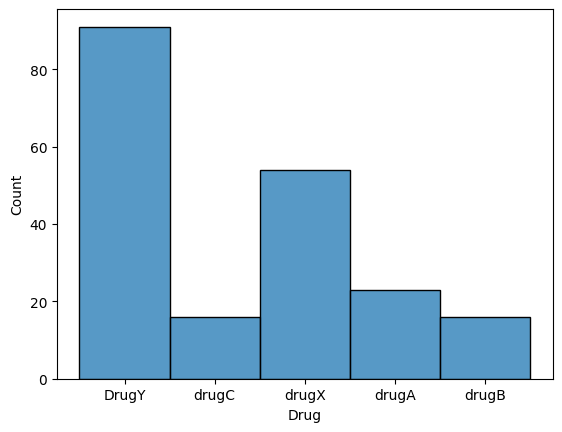

In [ ]:
sns.histplot(x='Drug',data=df)

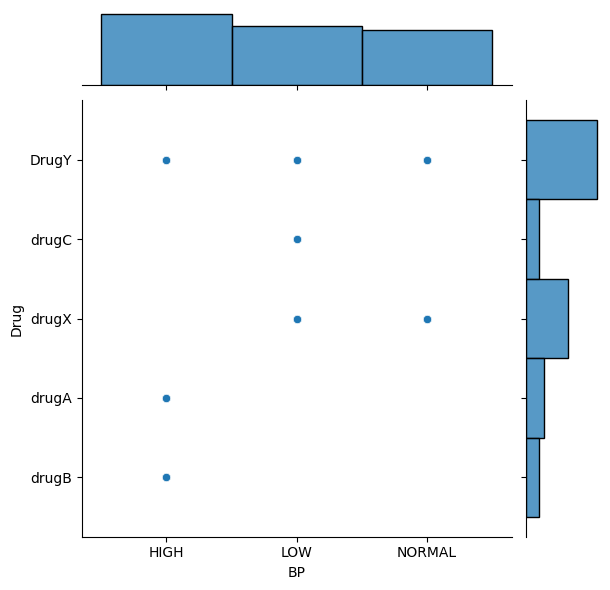

In [ ]:
sns.jointplot(x='BP',y='Drug',data=df,kind='scatter')

#DROP UNUSED COLUMNS

In [ ]:
new_df.columns

Index(['Age', 'BP', 'Na_to_K', 'Drug', 'Cholesterol_HIGH',
       'Cholesterol_NORMAL', 'Sex_F', 'Sex_M'],
      dtype='object')

In [ ]:
# new_df.drop(['COL1','COL2','COL3','COL4','COL5'],axis=1,inplace=True)
# new_df

#DROP ZERO & NEGATIVE VALUES FROM THE OUTPUT COLUMN

In [ ]:
#  drop_A=new_df.index[new_df[""] <= 0].tolist()
#  new_df=new_df.drop(new_df.index[drop_A])
#  new_df

# REPLACE THE NA VALUE IN ALL DF TO ZERO VALUE

In [ ]:
new_df.fillna(0,inplace=True) # TO FILL NA VALUE BY ZERO
new_df

,Age,BP,Na_to_K,Drug,Cholesterol_HIGH,Cholesterol_NORMAL,Sex_F,Sex_M
0,23,2.0,25.355,0.0,1,0,1,0
1,47,1.0,13.093,1.0,1,0,0,1
2,47,1.0,10.114,1.0,1,0,0,1
3,28,0.0,7.798,2.0,1,0,1,0
4,61,1.0,18.043,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...
195,56,1.0,11.567,1.0,1,0,1,0
196,16,1.0,12.006,1.0,1,0,0,1
197,52,0.0,9.894,2.0,1,0,0,1
198,23,0.0,14.020,2.0,0,1,0,1


In [ ]:
new_df.isnull().sum()

Age                   0
BP                    0
Na_to_K               0
Drug                  0
Cholesterol_HIGH      0
Cholesterol_NORMAL    0
Sex_F                 0
Sex_M                 0
dtype: int64

#PLOT OUTLIERS

<Axes: >

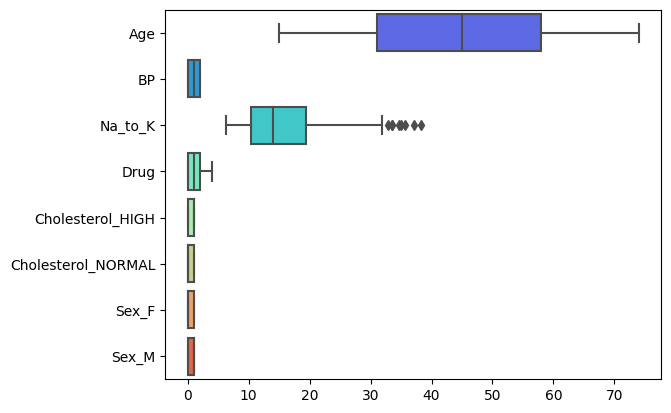

In [ ]:
sns.boxplot(data=new_df,palette='rainbow',orient='h')

#SPLIT DATA

In [ ]:
x=new_df.loc[:,new_df.columns != 'Drug']
y=new_df['Drug']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3 ,random_state=42)
# x_train,x_valid,y_train,y_valid =train_test_split(x_train,y_train,test_size=.1, random_state=42)

#STANDARD SCALLING

In [ ]:
# scaler = {
#             StandardScaler(),
#             MinMaxScaler(feature_range=(0,1)),
#             MinMaxScaler(feature_range=(-1,1)),
#             PowerTransformer(),
#             RobustScaler(unit_variance=True)
#         }

In [ ]:
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

In [ ]:
new_df.columns

Index(['Age', 'BP', 'Na_to_K', 'Drug', 'Cholesterol_HIGH',
       'Cholesterol_NORMAL', 'Sex_F', 'Sex_M'],
      dtype='object')

#DUPLICATE#

In [ ]:
new_df.duplicated().sum()

0

#MODELS#

In [ ]:
KNN_CLA_mode=KNeighborsClassifier()

#CROSS_VALIDATION

In [ ]:
# GKF = GroupKFold(n_splits=3)
# SKGF = StratifiedGroupKFold(n_splits=3)
# GSS = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
# TSCV = TimeSeriesSplit(n_splits=3)
# LOO = LeaveOneOut()
# SKF = StratifiedKFold(n_splits=3)
# SS = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score=cross_val_score(KNN_CLA_mode,x_train_sc,y_train,cv=kf) # kfold

#GRIDE_SEARCH#

In [ ]:
params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
}

In [ ]:
grid_search=GridSearchCV(
    estimator=KNN_CLA_mode.fit(x_train_sc, y_train),
    param_grid=params,verbose = 1, n_jobs = -1,
    scoring='recall',cv=10
)

In [ ]:
grid_search.fit(x_train_sc,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [ ]:
grid_search.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
KNN_CLA_mode=grid_search.best_estimator_

#OVERFITTING#

In [ ]:
new_df=KNN_CLA_mode.fit(x_test_sc, y_test)
new_df=KNN_CLA_mode.fit(x_train_sc,y_train)

#PREDICTION#

In [ ]:
y_pred_test_DT=KNN_CLA_mode.predict(x_test_sc)
y_pred_train_DT=KNN_CLA_mode.predict(x_train_sc)

#MODEL_PREDICTION#

In [ ]:
y_pred_DT=KNN_CLA_mode.predict(x_test_sc)

#CONFUSION_MATRIX

In [ ]:
cm=confusion_matrix(y_test,y_pred_test_DT)
cm

array([[20,  0,  3,  1,  2],
       [ 4,  2,  0,  0,  0],
       [ 1,  0, 17,  0,  0],
       [ 0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  3]])

<Axes: >

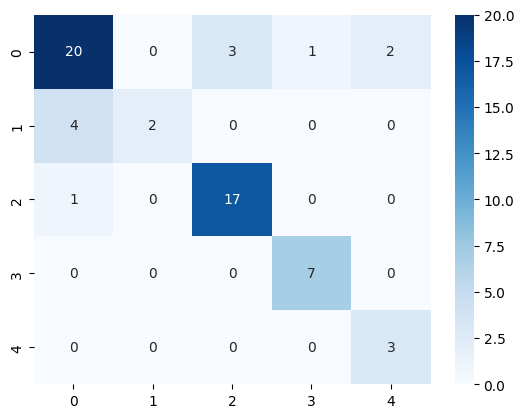

In [ ]:
sns.heatmap(cm,cmap='Blues',annot=True)

#ACCURACY_SCOR&RECALL&PRECISION&F1_TEST#

In [ ]:
accuracy_test=accuracy_score(y_test,y_pred_test_DT)*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy_test))

Accuracy for our training dataset with tuning is : 81.67%


In [ ]:
recall_test=recall_score(y_test,y_pred_test_DT, average='micro')*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(recall_test))

Accuracy for our training dataset with tuning is : 81.67%


In [ ]:
precision_test=precision_score(y_test,y_pred_test_DT, average='micro')*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(precision_test))

Accuracy for our training dataset with tuning is : 81.67%


In [ ]:
f1_test=f1_score(y_test,y_pred_test_DT, average='micro')*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(f1_test))

Accuracy for our training dataset with tuning is : 81.67%


#ACCURACY_SCOR&RECALL&PRECISION&F1_TRAIN#

In [ ]:
accuracy_train=accuracy_score(y_train,y_pred_train_DT)*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy_train))

Accuracy for our training dataset with tuning is : 87.14%


In [ ]:
recall_train=recall_score(y_train,y_pred_train_DT, average='micro')*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(recall_train))

Accuracy for our training dataset with tuning is : 87.14%


In [ ]:
precision_train=precision_score(y_train,y_pred_train_DT, average='micro')*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(precision_train))

Accuracy for our training dataset with tuning is : 87.14%


In [ ]:
f1_train=f1_score(y_train,y_pred_train_DT, average='micro')*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(f1_train))

Accuracy for our training dataset with tuning is : 87.14%


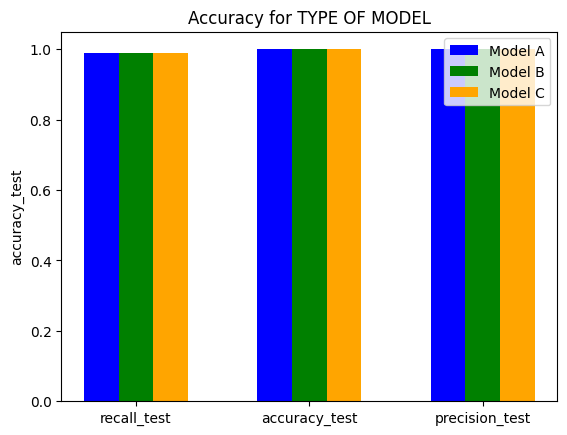

In [ ]:
labels = ['recall_test', 'accuracy_test', 'precision_test']
model_a = [0.99, 1, 1]
model_b = [0.99, 1, 1]
model_c = [0.99, 1, 1]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
ax.set_ylabel('accuracy_test')
ax.set_title('Accuracy for TYPE OF MODEL')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#PLT_R2_accuracy_test_TRAIN#

Text(0.5, 1.0, 'R2 Score for TYPE OF MODEL')

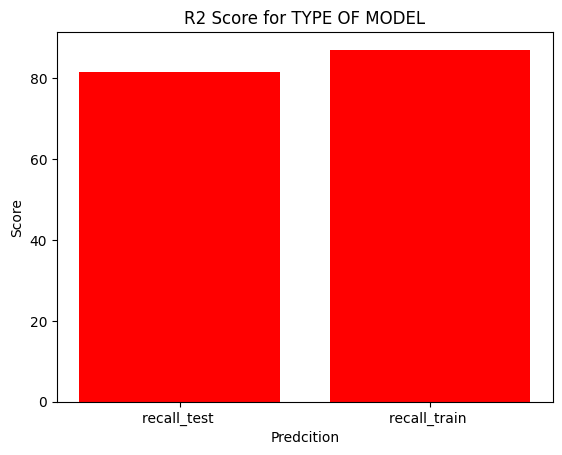

In [ ]:
x= ["recall_test ","recall_train "]
y=[recall_test ,recall_train]
plt.bar(x , y,color='RED')
plt.xlabel("Predcition")
plt.ylabel("Score")
plt.title("R2 Score for TYPE OF MODEL")